# Analisis de Marketing
***

**¿Cómo influyen los dias de la semana en la efectividad de nuestras campañas de  marketing y qué dias  deberian ser priorizados para maximizar el éxito de nuestras estrategias?**

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("../Data/df_250519.csv")
print(df.head())
print(df.shape)
print(df['deposit'].unique())
print(df['contact'].unique())

custom_palette = ["#2CCED1", "#5F6F81", "#AABBC8", "#DCE3EA", "#2E2F36"]

   Unnamed: 0  id  age         job  marital  education  default  balance  \
0           0   1   59      admin.  married  secondary    False     2343   
1           1   2   59      admin.  married  secondary    False     2343   
2           2   3   56      admin.  married  secondary    False       45   
3           3   4   41  technician  married  secondary    False     1270   
4           4   5   55    services  married  secondary    False     2476   

   housing   loan  contact  day month  duration  campaign  pdays  previous  \
0     True  False  unknown    5   May      1042         1     -1         0   
1     True  False  unknown    5   May      1042         1     -1         0   
2    False  False  unknown    5   May      1467         1     -1         0   
3     True  False  unknown    5   May      1389         1     -1         0   
4     True  False  unknown    5   May       579         1     -1         0   

  poutcome  deposit        date  
0  unknown     True  2024-05-05  
1  unk

*Extraemos dia del mes y de la semana y damos nombre a los dias de la semana*

In [59]:

df["date"] = pd.to_datetime(df["date"], errors='coerce')
df["monthday"] = df["date"].dt.day
df["day_of_week"] = df["date"].dt.day_name()

ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

weekday_stats = df.groupby("day_of_week")[["deposit", "age"]].agg({
    "deposit": "mean",
    "age": "mean"
}).rename(columns={
    "deposit": "tasa_conversion",
    "age": "edad_media"
}).round(2)

weekday_stats = weekday_stats.reindex(ordered_days)
weekday_stats





,tasa_conversion,edad_media
day_of_week,,
Monday,0.46,40.97
Tuesday,0.48,40.61
Wednesday,0.40,41.32
Thursday,0.33,40.43
Friday,0.69,42.58
Saturday,0.66,40.45
Sunday,0.49,42.17


Interpretación:
Viernes y sábado destacan con tasas muy altas de conversión (69% y 66%), siendo los días óptimos para lanzar campañas.

Jueves es el peor día de la semana para la conversión (33%).

Las edades medias no muestran grandes variaciones, pero sí se aprecia una ligera subida en viernes y domingo.

📌 Recomendaciones:
Priorizar viernes y sábado para las campañas intensivas.

Evitar jueves, salvo en segmentos muy específicos.

Considerar hacer pruebas A/B en lunes y martes, que muestran tasas estables pero mejorables.

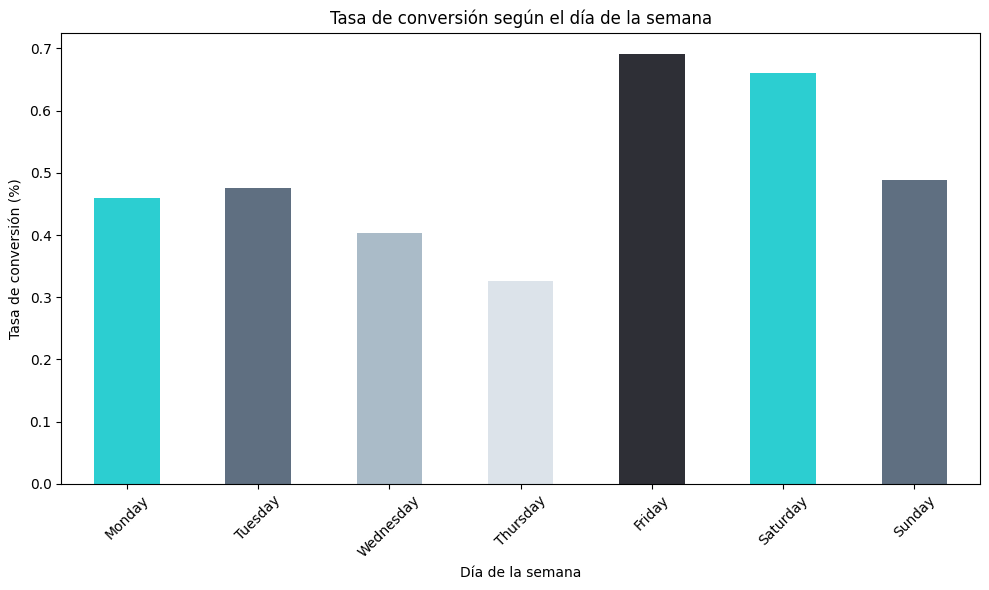

In [60]:
plt.figure(figsize=(10, 6))
conversion_by_weekday.plot(kind='bar', color=custom_palette[:7])
plt.title('Tasa de conversión según el día de la semana')
plt.ylabel('Tasa de conversión (%)')
plt.xlabel('Día de la semana')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

Priorizar contactos en viernes y sábado, ya que son los días con más éxito de conversión.

Evitar campañas prioritarias en jueves, pues presentan el peor rendimiento.

Planificación semanal:

Comenzar la semana (lunes-martes) con contactos suaves o pruebas A/B.

Reservar viernes-sábado para cerrar ventas o reforzar campañas.

Refuerzo con análisis de segmentos:

Podrías cruzar esta info con variables como edad, educación o tipo de contacto para ver si hay perfiles que responden mejor ciertos días.

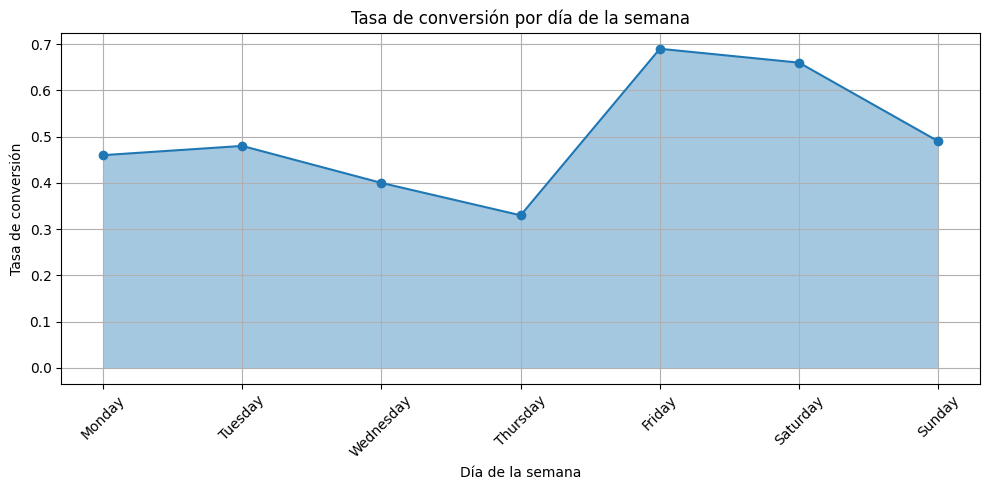

In [61]:
plt.figure(figsize=(10, 5))
plt.fill_between(weekday_stats.index, weekday_stats["tasa_conversion"], alpha=0.4)
plt.plot(weekday_stats.index, weekday_stats["tasa_conversion"], marker="o")
plt.title("Tasa de conversión por día de la semana")
plt.xlabel("Día de la semana")
plt.ylabel("Tasa de conversión")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


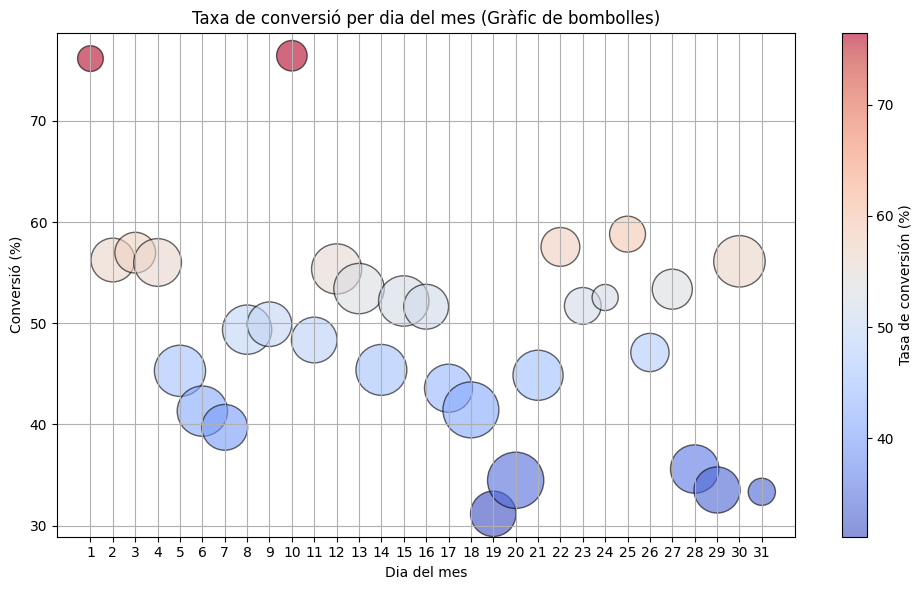

In [62]:
day_conversion = df.groupby('day')['deposit'].mean() * 100
day_counts = df['day'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.scatter(day_conversion.index, day_conversion.values, s=day_counts.values * 2, alpha=0.6, c=day_conversion.values, cmap='coolwarm', edgecolors='black')
plt.title('Taxa de conversió per dia del mes (Gràfic de bombolles)')
plt.xlabel('Dia del mes')
plt.ylabel('Conversió (%)')
plt.grid(True)
plt.xticks(range(1, 32))
plt.colorbar(label='Tasa de conversión (%)')
plt.tight_layout()
plt.show()

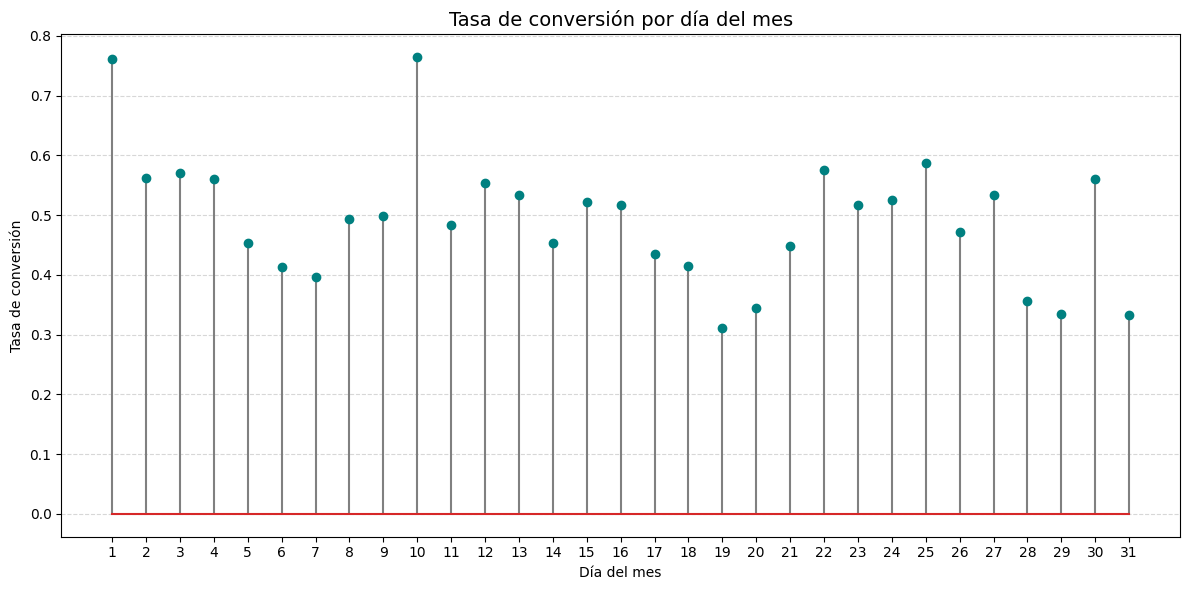

In [65]:
import matplotlib.pyplot as plt

# Agrupar por día del mes y calcular la tasa de conversión
day_conversion = df.groupby("monthday")["deposit"].mean()

# Crear gráfico de tallo (sin 'use_line_collection')
plt.figure(figsize=(12, 6))
markerline, stemlines, baseline = plt.stem(day_conversion.index, day_conversion.values)

# Personalización
plt.setp(markerline, marker='o', markersize=6, color='teal')
plt.setp(stemlines, color='gray')
plt.title("Tasa de conversión por día del mes", fontsize=14)
plt.xlabel("Día del mes")
plt.ylabel("Tasa de conversión")
plt.xticks(day_conversion.index)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
